# 🔹 LangGraph RAG Agent

This notebook walks you through the key building blocks leading up to a **LangGraph RAG Agent** implementation.

### 📚 Topics Covered:

1. **LangChain LLM Basics**  
2. **LLM Invocation**  
3. **LLM with Tools**  
4. **Structured Output from LLM**  
5. **Basic LangGraph Chatbot**  
6. **Adding Memory to the Chatbot**  
7. **LangGraph Agent with Tools**  
8. **LangGraph RAG Agent**  


## Part 1: LLM Basics

### INSTALLATION OF PACKAGES

In [ ]:
!pip install -qU langchain langchain-openai langchain-community langchain-core
# !pip install -qU duckduckgo-search wikipedia
# !pip install -qU pydantic

In [ ]:
import os
# Set up OpenAI API key
if not os.getenv("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = ""

###Enable LangSmith Tracing

In [ ]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = ""
os.environ["LANGCHAIN_PROJECT"] = "langgraph-yt"

### SECTION 1: BASIC LLM INVOCATION

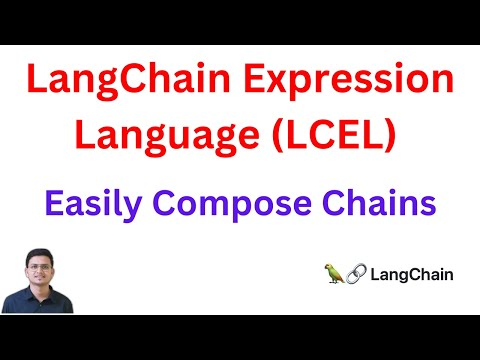

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('NQWfvhw7OcI')

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
# Initialize the LLM
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)

# Simple invocation
response = llm.invoke("What is artificial intelligence?")
print(response.content)

Artificial intelligence (AI) refers to the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using it), reasoning (using rules to reach approximate or definite conclusions), problem-solving, perception, language understanding, and decision-making. AI systems can be designed to perform tasks that typically require human intelligence, such as recognizing speech, identifying images, translating languages, and playing games. There are various types of AI, ranging from narrow AI, which is designed for specific tasks, to general AI, which aims to perform any intellectual task that a human can do.


In [ ]:
response

AIMessage(content='Artificial intelligence (AI) refers to the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using it), reasoning (using rules to reach approximate or definite conclusions), problem-solving, perception, language understanding, and decision-making. AI systems can be designed to perform tasks that typically require human intelligence, such as recognizing speech, identifying images, translating languages, and playing games. There are various types of AI, ranging from narrow AI, which is designed for specific tasks, to general AI, which aims to perform any intellectual task that a human can do.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 12, 'total_tokens': 135, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_t

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
# Using messages for more control
messages = [
    SystemMessage(content="You are a helpful AI assistant that explains complex topics simply."),
    HumanMessage(content="Explain machine learning in 2 sentences.")
]

response = llm.invoke(messages)
response

AIMessage(content='Machine learning is a branch of artificial intelligence where computers learn patterns from data to make decisions or predictions without being explicitly programmed. It enables systems to improve their performance automatically through experience.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 31, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-BizS3VOsA4gbW9p1rb3TnLfjY4ESW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b5d57fb6-e655-4644-b639-69b04b5f35f2-0', usage_metadata={'input_tokens': 31, 'output_tokens': 35, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outpu

In [ ]:
print(response.content)

Machine learning is a branch of artificial intelligence where computers learn patterns from data to make decisions or predictions without being explicitly programmed. It enables systems to improve their performance automatically through experience.


### LLM WITH TOOLS

In [ ]:
!pip install -qU duckduckgo-search

In [ ]:
from langchain_core.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun
# https://python.langchain.com/docs/integrations/tools/ddg/

In [ ]:
@tool
def calculator(expression: str) -> str:
    """Calculate mathematical expressions. Use this for any math calculations."""
    try:
        result = eval(expression)
        return f"The result of {expression} is {result}"
    except Exception as e:
        return f"Error calculating {expression}: {str(e)}"

search_tool = DuckDuckGoSearchRun()

# Bind tools to the LLM
tools = [calculator, search_tool]
llm_with_tools = llm.bind_tools(tools)

# Test the calculator tool
print("Testing Calculator Tool:")
response = llm_with_tools.invoke("What's 25 * 4 + 17?")
print(f"Response: {response.content}")

Testing Calculator Tool:
Response: 


In [ ]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5hF7RvedMKMTET0x8wxIFCBG', 'function': {'arguments': '{"expression":"25 * 4 + 17"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 107, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-BizTtJr7IPMg5kp1QWvHkiK0qjfY1', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f94bab0a-4be5-4464-9e1b-38e891f1bdd9-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '25 * 4 + 17'}, 'id': 'call_5hF7RvedMKMTET0x8wxIFCBG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 107, 'output_tokens': 20, 'total_tokens': 127, 'inp

In [ ]:
# Map tool names to tool objects for dynamic execution
tool_map = {
    'calculator': calculator,
    'duckduckgo_search': search_tool,
}

def handle_tool_calls(response, tool_map):
    """Executes all tool calls in the LLM response using the tool_map."""
    if not getattr(response, 'tool_calls', None):
        return

    print(f"Tool calls requested: {len(response.tool_calls)}")
    for tool_call in response.tool_calls:
        tool_name = tool_call['name']
        args = tool_call['args']
        print(f"Tool: {tool_name}")
        print(f"Args: {args}")

        tool = tool_map.get(tool_name)
        if tool:
            result = tool.invoke(args)
            # Print first 200 chars for long responses (e.g., search)
            preview = result[:200] + "..." if isinstance(result, str) and len(result) > 200 else result
            print(f"Tool result: {preview}")

In [ ]:
def test_llm_tool(query):
    print(f"Query: {query}")
    response = llm_with_tools.invoke(query)
    print(f"Response: {getattr(response, 'content', response)}")
    handle_tool_calls(response, tool_map)
    print("\n")

test_llm_tool("What's 25 * 4 + 17?")
test_llm_tool("Search for recent news about artificial intelligence")

Query: What's 25 * 4 + 17?
Response: 
Tool calls requested: 1
Tool: calculator
Args: {'expression': '25 * 4 + 17'}
Tool result: The result of 25 * 4 + 17 is 117


Query: Search for recent news about artificial intelligence
Response: 
Tool calls requested: 1
Tool: duckduckgo_search
Args: {'query': 'recent news about artificial intelligence'}
Tool result: Nvidia and artificial intelligence search firm Perplexity on Wednesday said they are partnering with more than a dozen AI firms in Europe and the Middle East to refine those firms' AI technologies ......




In [ ]:
search_tool.invoke("Search for recent news about artificial intelligence")

"How Artificial Intelligence is creating the next normal. ... Meta's $14.8 billion Scale AI deal latest test of AI partnerships. June 13, 2025. ... Reuters News Agency, opens new tab; Everything on AI including futuristic robots with artificial intelligence, computer models of human intelligence and more. ... Search. Free Subscriptions ... Keep up to date with the latest news ... Enter keywords to search for news articles: Submit. Browse By. Topics ... Artificial intelligence. Download RSS feed: News Articles / In the Media / Audio. Displaying 1 - 15 of 1375 news articles related to this topic. Show: News Articles. In the Media. Audio. Bringing meaning into technology deployment ... Follow the latest Artificial Intelligence news, videos, and analysis from ABC News. June 10, 2025 at 12:22 PM. Video game performers on strike for almost a year over AI issues reach tentative deal. Artificial Intelligence News. Explore the latest news and insights surrounding AI with expert articles brought

### STRUCTURED OUTPUT FROM LLM

In [ ]:
from pydantic import BaseModel, Field
from typing import List, Optional

In [ ]:
class PersonInfo(BaseModel):
    """Information about a person"""
    name: str = Field(description="Full name of the person")
    age: Optional[int] = Field(description="Age of the person")
    occupation: str = Field(description="Person's job or profession")
    skills: List[str] = Field(description="List of skills or expertise")

structured_llm = llm.with_structured_output(PersonInfo)

# Test with person information
print("Testing Structured Output - Person Info:")
person_prompt = """
Extract information about this person:
"John Smith is a 35-year-old software engineer who works at Google.
He specializes in machine learning, Python programming, and cloud architecture.
John has been working in tech for over 10 years and is passionate about AI research."
"""

person_result = structured_llm.invoke(person_prompt)
print(f"Name: {person_result.name}")
print(f"Age: {person_result.age}")
print(f"Occupation: {person_result.occupation}")
print(f"Skills: {', '.join(person_result.skills)}")

Testing Structured Output - Person Info:
Name: John Smith
Age: 35
Occupation: software engineer
Skills: machine learning, Python programming, cloud architecture


## Part 2: Basic LangGraph Chatbot

In [ ]:
!pip install -qU langgraph

### LangGraph STATE

In [ ]:
from typing import Annotated, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    """State for our chatbot - this holds the conversation history"""
    # The add_messages function handles appending new messages to the conversation
    messages: Annotated[list[BaseMessage], add_messages]

# Initialize the LLM
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)

### CREATING THE CHATBOT NODE

In [ ]:
def chatbot_node(state: State) -> State:
    """
    The main chatbot node that processes messages and generates responses
    """
    print(f"Processing {len(state['messages'])} messages")

    # Get the response from the LLM
    response = llm.invoke(state["messages"])

    # Return the updated state with the new response
    return {"messages": [response]}

print("Chatbot node function created")

Chatbot node function created


### BUILDING THE GRAPH

In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
graph_builder = StateGraph(State)

# Add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot_node)

# Define the flow: START -> chatbot -> END
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# Compile the graph
graph = graph_builder.compile()

print("Graph structure created")
print("Graph compiled successfully")

Graph structure created
Graph compiled successfully


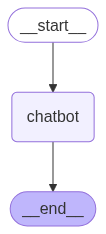

In [ ]:
# ============================================================================
# VISUALIZE THE GRAPH
# ============================================================================
img = graph.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)

from IPython.display import Image, display
display(Image("graph.png"))

### TESTING THE CHATBOT

In [ ]:
def test_chatbot(message: str):
    """Helper function to test our chatbot"""
    print(f"\n🤖 User: {message}")

    # Create the initial state with the user message
    initial_state = {"messages": [HumanMessage(content=message)]}

    # Run the graph
    result = graph.invoke(initial_state)

    # Get the AI response
    ai_response = result["messages"][-1].content
    print(f"🤖 Assistant: {ai_response}")

    return result

# Test with simple messages
test_cases = [
    "Hello! My Name Pradip?",
    "Do you remeber my name"
]

for test_message in test_cases:
    test_chatbot(test_message)


🤖 User: Hello! My Name Pradip?
Processing 1 messages
🤖 Assistant: Hello, Pradip! How can I assist you today?

🤖 User: Do you remeber my name
Processing 1 messages
🤖 Assistant: I don’t have access to previous interactions, so I don’t remember your name. What would you like me to call you?


### ADDING MEMORY TO THE CHATBOT

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
memory = MemorySaver()

# Compile the graph with memory
graph_with_memory = graph_builder.compile(checkpointer=memory)

print("Memory added to chatbot")

def chat_with_memory(message: str, thread_id: str):
    """Chat function with memory"""
    print(f"\n👤 User: {message}")

    # Configuration for the thread
    config = {"configurable": {"thread_id": thread_id}}

    # Add the user message to the conversation
    initial_state = {"messages": [HumanMessage(content=message)]}

    # Run the graph with memory
    result = graph_with_memory.invoke(initial_state, config)

    # Get the AI response
    ai_response = result["messages"][-1].content
    print(f"🤖 Assistant: {ai_response}")


# Test conversation with memory
print("\nTesting Conversation with Memory:")

# Start a conversation
chat_with_memory("Hi, my name is Pradip", thread_id="thread-1")
chat_with_memory("What's my name?", thread_id="thread-1")

Memory added to chatbot

Testing Conversation with Memory:

👤 User: Hi, my name is Pradip
Processing 1 messages
🤖 Assistant: Hello Pradip! How can I assist you today?

👤 User: What's my name?
Processing 3 messages
🤖 Assistant: Your name is Pradip. How can I help you further?


## Part 3: Langgraph Agent with Tools

In [ ]:
class AgentState(TypedDict):
    """State for our two-node agent"""
    messages: Annotated[list[BaseMessage], add_messages]

# Initialize LLM with tools
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)
llm_with_tools = llm.bind_tools(tools)

### CREATING CHATBOT NODE

In [ ]:
def chatbot_node(state: AgentState) -> AgentState:
    """
    The chatbot node that decides whether to use tools or provide direct responses
    """
    messages = state["messages"]

    # Add system prompt
    system_message = """You are a helpful AI assistant. You have access to web search and calculator tools.

    Use the web_search tool when:
    - Asked about current events, news, or recent information
    - Need to find specific facts or data
    - Asked about real-time information (weather, stock prices, etc.)

    Use the calculator tool when:
    - Asked to perform mathematical calculations
    - Need to solve math problems

    For general knowledge questions that don't require real-time data, answer directly.
    Be helpful and conversational in your responses."""

    # Prepare messages with system prompt
    all_messages = [{"role": "system", "content": system_message}] + messages

    # Get response from LLM
    response = llm_with_tools.invoke(all_messages)

    return {"messages": [response]}

print("Chatbot node created")

Chatbot node created


### CREATING TOOL NODE AND ROUTING LOGIC

In [ ]:
from langgraph.prebuilt import ToolNode
from typing import Literal

In [ ]:
tools

[StructuredTool(name='calculator', description='Calculate mathematical expressions. Use this for any math calculations.', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x7d5a0833a520>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [ ]:
tool_node = ToolNode(tools)

print("Tool node created")


def should_continue(state: AgentState) -> Literal["tools", "end"]:
    """
    Determine whether to continue to tools or end the conversation
    """
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message has tool calls, go to tools
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    # Otherwise, end the conversation
    else:
        return "end"

print("Routing logic created")

Tool node created
Routing logic created


### BUILDING GRAPH

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

Graph compiled with memory



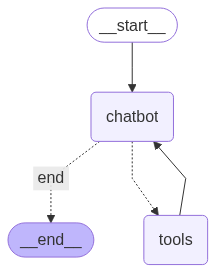

In [ ]:
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools", tool_node)

# Set entry point
workflow.add_edge(START, "chatbot")

# Add conditional edges
workflow.add_conditional_edges(
    "chatbot",
    should_continue,
    {
        "tools": "tools",
        "end": END,
    },
)

# After using tools, go back to chatbot
workflow.add_edge("tools", "chatbot")

# Compile the graph
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

print("Graph compiled with memory\n")

# ============================================================================
# VISUALIZE THE GRAPH
# ============================================================================
img = app.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)

from IPython.display import Image, display
display(Image("graph.png"))

### TESTING AGENT

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage
def chat_with_agent(message: str, thread_id: str):
    """Chat with the two-node agent"""
    print(f"\n👤 User: {message}")

    config = {"configurable": {"thread_id": thread_id}}

    # Stream the response to see the process
    messages_to_process = {"messages": [HumanMessage(content=message)]}

    for event in app.stream(messages_to_process, config):
        for value in event.values():
            if "messages" in value:
                last_message = value["messages"][-1]
                if hasattr(last_message, 'content') and last_message.content:
                    if isinstance(last_message, AIMessage):
                        print(f"🤖 Assistant: {last_message.content}")
                    elif isinstance(last_message, ToolMessage):
                        print(f"🔧 Tool Result: {last_message.content[:100]}...")

while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break
    chat_with_agent(user_input, thread_id="thread-2")

# Questions
# I am Pradip
# Do you remember my name
# What's 15% of 240?
# What's the latest news about artificial intelligence?
# Follow-up: Can you tell me more about that?

User: I am Pradip

👤 User: I am Pradip
🤖 Assistant: Hello Pradip! How can I assist you today?
User: What's 15% of 240?

👤 User: What's 15% of 240?
🔧 Tool Result: The result of 0.15 * 240 is 36.0...
🤖 Assistant: 15% of 240 is 36. If you have any more questions or need further assistance, feel free to ask!


KeyboardInterrupt: Interrupted by user

## Part 4: Advanced Langgraph Agent

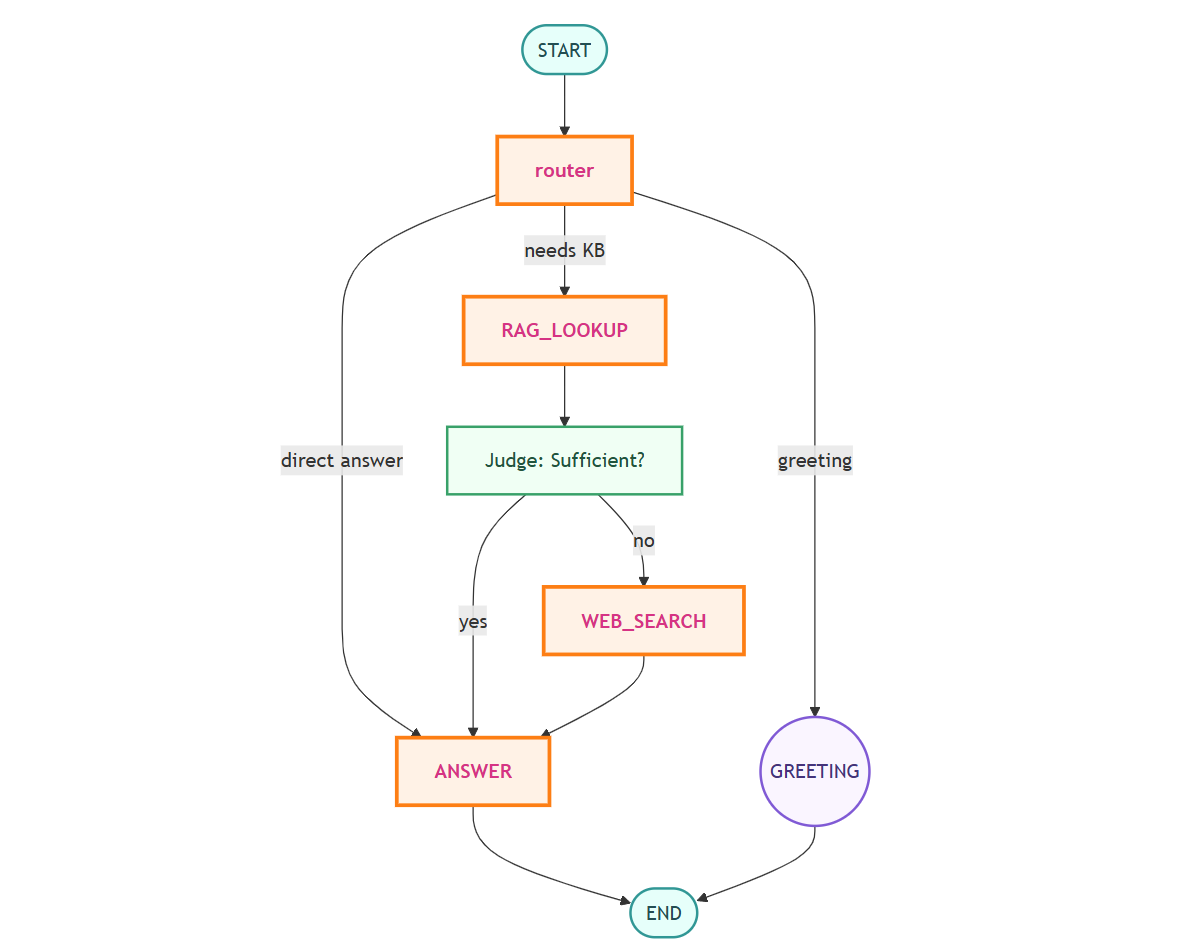

In [ ]:
from IPython.display import Image, display
display(Image('/content/rag agent flow minimal.png', width=500))

In [ ]:
!pip install -qU langgraph langchain langchain-openai langchain-core langchain-community langchain-chroma chromadb
# !pip install -qU duckduckgo-search faiss-cpu
# !pip install -qU langsmith sentence-transformers

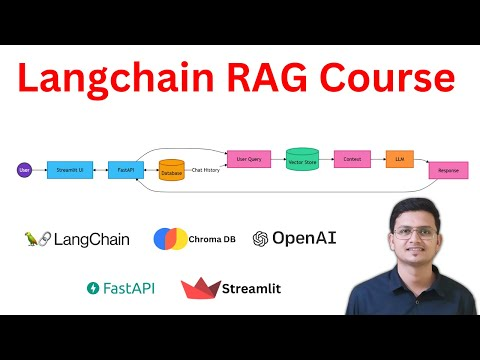

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('38aMTXY2usU')

In [ ]:
"""
Build & persist a Chroma vector index from PDF / DOCX / MD / TXT files.
Run this once; the agent will query the saved index at runtime.
"""
# ── Imports ───────────────────────────────────────────────────────────
from pathlib import Path
from typing   import List
from langchain_community.document_loaders import (
    PyPDFLoader, Docx2txtLoader, TextLoader, UnstructuredMarkdownLoader
)
from langchain_community.document_loaders.directory import DirectoryLoader
from langchain_text_splitters          import RecursiveCharacterTextSplitter
from langchain_openai                  import OpenAIEmbeddings
from langchain_community.vectorstores  import Chroma
from langchain_core.documents          import Document

In [ ]:
!pip -q install docx2txt pypdf unstructured

In [ ]:
def load_documents(folder_path: str) -> List[Document]:
    documents = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.pdf'):
            loader = PyPDFLoader(file_path)
        elif filename.endswith('.docx'):
            loader = Docx2txtLoader(file_path)
        else:
            print(f"Unsupported file type: {filename}")
            continue
        documents.extend(loader.load())
    return documents

folder_path = "/content/docs"
documents = load_documents(folder_path)
print(f"Loaded {len(documents)} documents from the folder.")

Loaded 5 documents from the folder.


In [ ]:
documents[0]

Document(metadata={'source': '/content/docs/Company_ GreenFields BioTech.docx'}, page_content='Company: GreenFields BioTech\n\nHeadquarters: GreenFields BioTech is headquartered in Zurich, Switzerland. Known for its groundbreaking research in sustainable agriculture and biotechnology, the company has strategically positioned itself in Zurich, a city recognized for its leadership in scientific research and innovation. This location provides GreenFields BioTech with an ideal environment to collaborate with leading academic institutions and industry experts, driving forward its mission to create eco-friendly farming solutions.')

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len
)

chunks = text_splitter.split_documents(documents)
print(f"Split the documents into {len(chunks)} chunks.")

Split the documents into 8 chunks.


In [ ]:
# ── Config ────────────────────────────────────────────────────────────
SOURCE_DIR   = Path("docs")             # put your files here
INDEX_DIR    = Path("chroma_db_1")        # will be created if missing
COLLECTION   = "kb_collection"
EMBED_MODEL  = "text-embedding-3-small"

embeddings = OpenAIEmbeddings(model=EMBED_MODEL)
vectordb   = Chroma.from_documents(
    documents         = chunks,
    embedding         = embeddings,
    persist_directory = str(INDEX_DIR),
    collection_name   = COLLECTION,
)
vectordb.persist()
print("Index built at", INDEX_DIR.resolve())

Index built at /content/chroma_db_1


In [ ]:
retriever = vectordb.as_retriever(search_kwargs={"k": 2})
retriever_results = retriever.invoke("When was GreenGrow Innovations founded?")
retriever_results

[Document(metadata={'source': '/content/docs/GreenGrow Innovations_ Company History.docx'}, page_content='GreenGrow Innovations was founded in 2010 by Sarah Chen and Michael Rodriguez, two agricultural engineers with a passion for sustainable farming. The company started in a small garage in Portland, Oregon, with a simple mission: to make farming more environmentally friendly and efficient.\n\n\n\nIn its early days, GreenGrow focused on developing smart irrigation systems that could significantly reduce water usage in agriculture. Their first product, the WaterWise Sensor, was launched in 2012 and quickly gained popularity among local farmers. This success allowed the company to expand its research and development efforts.\n\n\n\nBy 2015, GreenGrow had outgrown its garage origins and moved into a proper office and research facility in the outskirts of Portland. This move coincided with the development of their second major product, the SoilHealth Monitor, which used advanced sensors t

https://python.langchain.com/docs/integrations/tools/tavily_search/

In [ ]:
%pip install -qU langchain-tavily

In [ ]:
import os

if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = ""

In [ ]:
from langchain_tavily import TavilySearch

tavily = TavilySearch(max_results=3, topic="general")

@tool
def web_search_tool(query: str) -> str:
    """Up-to-date web info via Tavily"""
    try:
        result = tavily.invoke({"query": query})

        # Extract and format the results from Tavily response
        if isinstance(result, dict) and 'results' in result:
            formatted_results = []
            for item in result['results']:
                title = item.get('title', 'No title')
                content = item.get('content', 'No content')
                url = item.get('url', '')
                formatted_results.append(f"Title: {title}\nContent: {content}\nURL: {url}")

            return "\n\n".join(formatted_results) if formatted_results else "No results found"
        else:
            return str(result)
    except Exception as e:
        return f"WEB_ERROR::{e}"

@tool
def rag_search_tool(query: str) -> str:
    """Top-3 chunks from KB (empty string if none)"""
    try:
        docs = retriever.invoke(query, k=3)
        return "\n\n".join(d.page_content for d in docs) if docs else ""
    except Exception as e:
        return f"RAG_ERROR::{e}"

In [ ]:
tavily.invoke({"query": "Who is Prdip Nichite"})

{'query': 'Who is Prdip Nichite',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://in.linkedin.com/in/pradipnichite',
   'title': 'Pradip Nichite - Upwork - LinkedIn',
   'content': 'Pradip Nichite\nFounder at FutureSmart AI | Generative AI Solutions | AI Agents & Automation | RAG | NL2SQL\nMumbai, India\n500 connections, 32263 followers\n\n\nAbout:\nI am the Founder & CEO of FutureSmart AI, where we develop Custom AI solutions that solve real business challenges, focusing on Generative AI, RAG (Retrieval-Augmented Generation), NL2SQL, and Large Language Models (LLMs).\n\n🚀 From Freelancing to Building FutureSmart AI\n\nIn 2022, I quit my job and went all-in on freelancing, building custom NLP & AI solutions for global clients. What started as a self-employed journey turned into $300K+ earnings on Upwork with a 100% Job Success rate. I also earned Upwork Expert-Vetted status, placing me among the top 1% of freelancers on the platform.\n\nInspi

In [ ]:
web_search_tool.invoke("Who is Prdip Nichite")

'Title: Pradip Nichite - Upwork - LinkedIn\nContent: Pradip Nichite\nFounder at FutureSmart AI | Generative AI Solutions | AI Agents & Automation | RAG | NL2SQL\nMumbai, India\n500 connections, 32263 followers\n\n\nAbout:\nI am the Founder & CEO of FutureSmart AI, where we develop Custom AI solutions that solve real business challenges, focusing on Generative AI, RAG (Retrieval-Augmented Generation), NL2SQL, and Large Language Models (LLMs).\n\n🚀 From Freelancing to Building FutureSmart AI\n\nIn 2022, I quit my job and went all-in on freelancing, building custom NLP & AI solutions for global clients. What started as a self-employed journey turned into $300K+ earnings on Upwork with a 100% Job Success rate. I also earned Upwork Expert-Vetted status, placing me among the top 1% of freelancers on the platform.\n\nInspired by my freelancing success, I founded FutureSmart AI in September 2022. We provide custom AI solutions for clients using the latest AI models and techniques in Generative

In [ ]:
rag_search_tool.invoke("what is GreenGrow")

"The company's breakthrough came in 2018 with the introduction of the EcoHarvest System, an integrated solution that combined smart irrigation, soil monitoring, and automated harvesting techniques. This system caught the attention of large-scale farmers across the United States, propelling GreenGrow to national prominence.\n\n\n\nToday, GreenGrow Innovations employs over 200 people and has expanded its operations to include offices in California and Iowa. The company continues to focus on developing sustainable agricultural technologies, with ongoing projects in vertical farming, drought-resistant crop development, and AI-powered farm management systems.\n\n\n\nDespite its growth, GreenGrow remains committed to its original mission of promoting sustainable farming practices. The company regularly partners with universities and research institutions to advance the field of agricultural technology and hosts annual conferences to share knowledge with farmers and other industry professiona

In [ ]:
# ── Pydantic schemas ─────────────────────────────────────────────────
class RouteDecision(BaseModel):
    route: Literal["rag", "answer", "end"]
    reply: str | None = Field(None, description="Filled only when route == 'end'")

class RagJudge(BaseModel):
    sufficient: bool

In [ ]:
# ── LLM instances with structured output where needed ───────────────
router_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)\
             .with_structured_output(RouteDecision)
judge_llm  = ChatOpenAI(model="gpt-4.1-mini", temperature=0)\
             .with_structured_output(RagJudge)
answer_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)

In [ ]:
# ── Shared state type ────────────────────────────────────────────────
class AgentState(TypedDict, total=False):
    messages: List[BaseMessage]
    route:    Literal["rag", "answer", "end"]
    rag:      str
    web:      str

In [ ]:
# ── Node 1: decision/router ─────────────────────────────────────────
def router_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")

    # Use structured output properly - pass messages directly
    messages = [
        ("system", (
            "You are a router that decides how to handle user queries:\n"
            "- Use 'end' for pure greetings/small-talk (also provide a 'reply')\n"
            "- Use 'rag' when knowledge base lookup is needed\n"
            "- Use 'answer' when you can answer directly without external info"
        )),
        ("user", query)
    ]

    result: RouteDecision = router_llm.invoke(messages)

    out = {"messages": state["messages"], "route": result.route}
    if result.route == "end":
        out["messages"] = state["messages"] + [AIMessage(content=result.reply or "Hello!")]
    return out

In [ ]:
# ── Node 2: RAG lookup ───────────────────────────────────────────────
def rag_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")

    chunks = rag_search_tool.invoke({"query": query})

    # Use structured output to judge if RAG results are sufficient
    judge_messages = [
        ("system", (
            "You are a judge evaluating if the retrieved information is sufficient "
            "to answer the user's question. Consider both relevance and completeness."
        )),
        ("user", f"Question: {query}\n\nRetrieved info: {chunks}\n\nIs this sufficient to answer the question?")
    ]

    verdict: RagJudge = judge_llm.invoke(judge_messages)

    return {
        **state,
        "rag": chunks,
        "route": "answer" if verdict.sufficient else "web"
    }

# ── Node 3: web search ───────────────────────────────────────────────
def web_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")
    snippets = web_search_tool.invoke({"query": query})
    return {**state, "web": snippets, "route": "answer"}


In [ ]:
# ── Node 4: final answer ─────────────────────────────────────────────
def answer_node(state: AgentState) -> AgentState:
    user_q = next((m.content for m in reversed(state["messages"])
                   if isinstance(m, HumanMessage)), "")

    ctx_parts = []
    if state.get("rag"):
        ctx_parts.append("Knowledge Base Information:\n" + state["rag"])
    if state.get("web"):
        ctx_parts.append("Web Search Results:\n" + state["web"])

    context = "\n\n".join(ctx_parts) if ctx_parts else "No external context available."

    prompt = f"""Please answer the user's question using the provided context.

Question: {user_q}

Context:
{context}

Provide a helpful, accurate, and concise response based on the available information."""

    ans = answer_llm.invoke([HumanMessage(content=prompt)]).content

    return {
        **state,
        "messages": state["messages"] + [AIMessage(content=ans)]
    }

In [ ]:
# ── Routing helpers ─────────────────────────────────────────────────
def from_router(st: AgentState) -> Literal["rag", "answer", "end"]:
    return st["route"]

def after_rag(st: AgentState) -> Literal["answer", "web"]:
    return st["route"]

def after_web(_) -> Literal["answer"]:
    return "answer"

In [ ]:
# ── Build graph ─────────────────────────────────────────────────────
g = StateGraph(AgentState)
g.add_node("router", router_node)
g.add_node("rag_lookup", rag_node)
g.add_node("web_search", web_node)
g.add_node("answer", answer_node)

g.set_entry_point("router")
g.add_conditional_edges("router", from_router,
                        {"rag": "rag_lookup", "answer": "answer", "end": END})
g.add_conditional_edges("rag_lookup", after_rag,
                        {"answer": "answer", "web": "web_search"})
g.add_edge("web_search",  "answer")
g.add_edge("answer", END)

agent = g.compile(checkpointer=MemorySaver())


https://agent.futuresmart.ai/

In [ ]:
# ── Quick CLI test ───────────────────────────────────────────────────
if __name__ == "__main__":
    config = {"configurable": {"thread_id": "thread-12"}}
    print("RAG Agent CLI (type 'quit' or 'exit' to stop)")
    print("-" * 50)

    while True:
        q = input("\nYou: ").strip()
        if q.lower() in {"quit", "exit"}:
            break

        try:
            result = agent.invoke(
                {"messages": [HumanMessage(content=q)]},
                config=config
            )

            # Get the last AI message
            last_message = next((m for m in reversed(result["messages"])
                               if isinstance(m, AIMessage)), None)

            if last_message:
                print(f"Agent: {last_message.content}")
            else:
                print("Agent: No response generated")

        except Exception as e:
            print(f"Error: {e}")

    print("\nGoodbye!")

RAG Agent CLI (type 'quit' or 'exit' to stop)
--------------------------------------------------

You: Hello
Agent: Hello! How can I assist you today?

You: when was greengrow founded
Agent: GreenGrow Innovations was founded in 2010.


KeyboardInterrupt: Interrupted by user

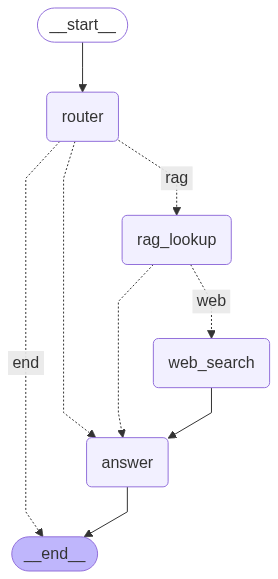

In [ ]:
img = agent.get_graph(xray=True).draw_mermaid_png()
with open("agent.png", "wb") as f:
    f.write(img)

from IPython.display import Image, display
display(Image("agent.png"))